In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from collections import Counter
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cross_validation import train_test_split
from sklearn import datasets
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


# The problem

In this notebook we will use a clustering method such as the K-means but we will implement it and test it more like a classifier would be. This is only possible because with the K-means method we have the possibility to predetermine the number of cluster that it will give as an output. Since the attribute that we are studyng is attrition and it is a binary class, we will ask the algorithm to split the data set in two clusters and than we will test them with respect to class "Attrition".

For further testing purposes we are splitting the dataset in train and test set.

In [4]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.8, random_state = 1)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

For Main Data Set : 1470
For Train Set : 1176
For Test Set : 294
Duration: --- 9.975035985310872e-05 Minutes ---


In [5]:
X = x_train.iloc[:,:].values
y = y_train.values

Let's try to plot the elbow plot

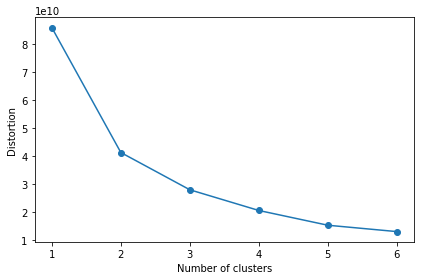

In [6]:
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=1)
    km.fit(x_train)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [7]:
for i in range(0,5):
    if i>0:
        print("SSE :"+str(((distortions[i-1]-distortions[i])/distortions[i-1])*100)+" for k="+str(i))

SSE :51.870092098364196 for k=1
SSE :32.15582544029167 for k=2
SSE :26.33150894765993 for k=3
SSE :25.46042283879836 for k=4


From the plot and the previous output we can clearly see that the best number of clusters would be either 3 or 4, however, for the purpose of this excercise, since we ave only two classes, we will use two as the number of cluster well knowing that 3 or 4 would give better results in terms of clustering.

Here, since it's impossible to plot all the dimension, we just try to plot age and monthly income

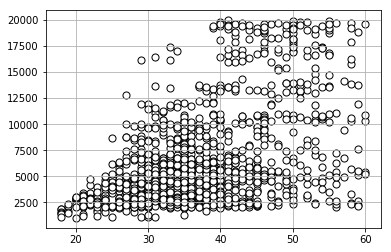

In [8]:
hori, vert = [0, 12]
plt.scatter(X[:,hori], X[:,vert], c='white', edgecolors='black', marker='o', s=50)
plt.grid()


In [9]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=50, 
            max_iter=52000,
            tol=1e-04,
            random_state=1)

In [10]:
y_km = km.fit_predict(X)

Since we have just applied the K-means clustering algorithm we will print the resulting clusters with their centroids

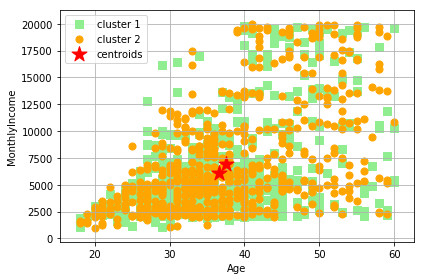

In [11]:
# Plot the real cluster values ===================================================================
# scatter plot of elements of cluster 0 (named cluster 1)
plt.scatter(X[y_km==0,hori], # select only the rows for which cluster label is 0
            X[y_km==0,vert], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
# scatter plot of elements of cluster 1 (named cluster 2)
plt.scatter(X[y_km==1,hori], # select only the rows for which cluster label is 1
            X[y_km==1,vert], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')

# plot the centers  ===================================================================
names = x_train.columns
# scatter plot of the centroids
plt.scatter(km.cluster_centers_[:,hori], 
            km.cluster_centers_[:,vert], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.xlabel(names[hori]) # set the names of the axes
plt.ylabel(names[vert])
plt.legend() # the legend is automatically drawn from the "label" parameter
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

Using age and monthly income as dimension and looking at the plot the clustering doesn't look very good but for the purpose of this excercise is not really a problem.

### Evaluation

Now we want to build a set of performance metrics for the resulting clustering, such as distortion, silhouette coefficient, a classification report and the ROC curve. This last two are possible in this case just because, as i specified at the beginning, we are using the K-means for clustering purposes and we made it split the dataset in just 2 clusters.

### Distortion

In [12]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 41357475713.04


### Silhouette Coefficient

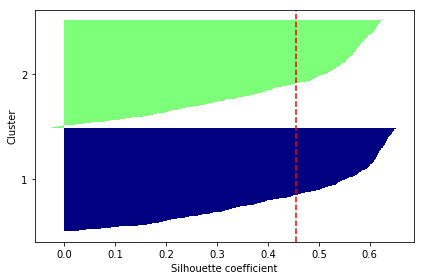

Silhouettes average width :0.4553015610935002


In [13]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
    c_silhouette_vals = silhouette_vals[y_km==c] # extracts records with the current cluster label
    c_silhouette_vals.sort() # sort the silhouette vals for the current class
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()
print("Silhouettes average width :"+str(silhouette_avg))

This value indicates how points into the same cluster are alike and different from points outside the cluster.
Realistically speaking is not bad result this clustering is quite effective from this point of view.

In [14]:
y_pred=km.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.81      0.52      0.64       236
    Class 1       0.21      0.52      0.30        58

avg / total       0.70      0.52      0.57       294



Precision is the ability to predict the unknown class on future data.
Recall (also known as sensitivity) is the rate of the positives over relevant results that i can catch from future data.

In this case the precision is 0,70 and the sensitivity is 0,52

As last measure, we are plotting the ROC curve that illustrate the ability to make good prediction of a binary classifier.

ROC AUC: 0.52


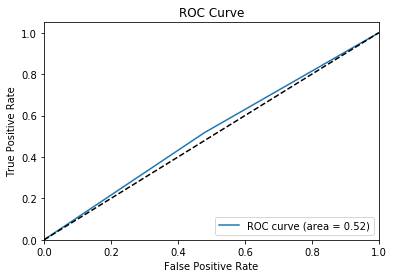

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

From the plot we can see that our classifier doesn't bring a significant improvement over the randomly positive choice (assuming that a positive is Attrition = 1 in our case). 
The area under the curve (AUC) is another accuracy measure and in our case is 0.52

# First feature selection: Backward Elimination on SAS

For improvement reasons we run a backward elimination on SAS and as a result we got a list of attributes that weren't significant for our analysis.
Now we'll create a new dataframe including the only significant attributes according to the backward elimination SAS's output, and then we are running again all the process.
After that we are going to evaluate the results compairing those with the previous ones.

At the ending of this code section we will illustrate a table with performance measures from both the attempts so that evaluation will be easier

In [17]:
dfSAS=df[["Attrition","BusinessTravel","EducationField_Human Resources","EducationField_Life Sciences","EducationField_Marketing",
      "EducationField_Medical","EducationField_Other","EducationField_Technical Degree","EnvironmentSatisfaction",
      "JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","OverTime","RelationshipSatisfaction","StockOptionLevel",
      "WorkLifeBalance","Age","DistanceFromHome","NumCompaniesWorked","TotalWorkingYears"]]

In [18]:
dfSAS.head()

,Attrition,BusinessTravel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Age,DistanceFromHome,NumCompaniesWorked,TotalWorkingYears
0,1,1,0,1,0,0,0,0,2,3,2,0,0,0,0,0,0,0,1,0,1,1,0,1,41,1,8,8
1,0,2,0,1,0,0,0,0,3,2,2,0,0,0,0,0,0,1,0,0,0,4,1,3,49,8,1,10
2,1,1,0,0,0,0,1,0,4,2,1,0,0,1,0,0,0,0,0,0,1,2,0,3,37,2,6,7
3,0,2,0,1,0,0,0,0,4,3,1,0,0,0,0,0,0,1,0,0,1,3,0,3,33,3,1,8
4,0,1,0,0,0,1,0,0,1,3,1,0,0,1,0,0,0,0,0,0,0,4,1,3,27,2,9,6


In [20]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(dfSAS, train_size = 0.8, random_state=1)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[0], axis = 1)
x_test=test.drop(test.columns[0], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

For Main Data Set : 1470
For Train Set : 1176
For Test Set : 294
Duration: --- 8.36332639058431e-05 Minutes ---


In [21]:
X = x_train.iloc[:,:].values
y = y_train.values

In [22]:
for i in range(0,5):
    if i>0:
        print("SSE :"+str(((distortions[i-1]-distortions[i])/distortions[i-1])*100)+" for k="+str(i))

SSE :51.870092098364196 for k=1
SSE :32.15582544029167 for k=2
SSE :26.33150894765993 for k=3
SSE :25.46042283879836 for k=4


In [23]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=50, 
            max_iter=52000,
            tol=1e-04,
            random_state=1)

y_km = km.fit_predict(X)

In [24]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 166199.59


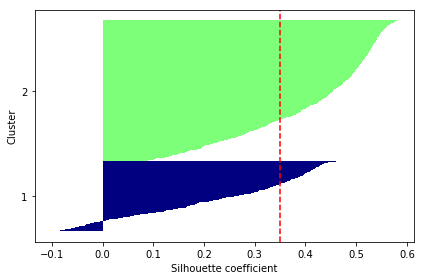

Silhouettes average width :0.3504970191284379


In [26]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
    c_silhouette_vals = silhouette_vals[y_km==c] # extracts records with the current cluster label
    c_silhouette_vals.sort() # sort the silhouette vals for the current class
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()
print("Silhouettes average width :"+str(silhouette_avg))

In [27]:
y_pred=km.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.91      0.34      0.49       236
    Class 1       0.24      0.86      0.38        58

avg / total       0.78      0.44      0.47       294



ROC AUC: 0.60


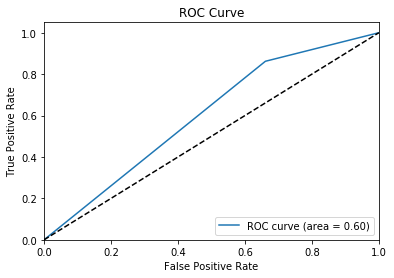

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

| Dataset | Distortion | Silhouettes average width | Precision | Recall | ROC_AUC |
| ------ | ------ | ------ | ------ | ------ | ------ |
| Main Encoded Data | 41357475713.04 | 0.4553015610935002 | 0.70 | 0.52 | 0.52 |
| Backward Elimination SAS | 166199.59 | 0.3504970191284379 | 0.78 | 0.44 | 0.60 |

We can see some improvements like for example a great one is gained in distortion. Accuracy is slightly higher as we can see from the improvement both in Precision and in the AUC. However the recall results a little bit lower and the silhouette plot was not better than the first one.
Since we are just trying to classify through clustering techiques we preferred the results obtained with the reduced dataset.
Now let's try with another kind of future selection and let's compare at the end the results.

# Second feature selection: CFS on Weka

We also decided to try with a different feature selection. For the second attempt we used Weka and we run a Correlation-based Feature Selection, wich as the name suggests, select the most significant attributes evaluating the correlation with, in our case, the attrition. Wich is different from the first one since the backward elimination is based on regression and this one on correlation.

Let's create the new dataframe, run the algorithm and collect the result. At the end there will be a new and complete table with all the results and we'll be able to establish wich of the feature selection techniques worked better with respect to our goal.

In [30]:
dfCFS=df[["Attrition","Age","BusinessTravel","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","JobSatisfaction","MonthlyIncome","OverTime","StockOptionLevel",
       "TotalWorkingYears","WorkLifeBalance","YearsAtCompany","YearsWithCurrManager"]]


In [31]:
dfCFS.head()

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager
0,1,41,1,2,3,2,0,0,0,0,0,0,0,1,0,4,5993,1,0,8,1,6,5
1,0,49,2,3,2,2,0,0,0,0,0,0,1,0,0,2,5130,0,1,10,3,10,7
2,1,37,1,4,2,1,0,0,1,0,0,0,0,0,0,3,2090,1,0,7,3,0,0
3,0,33,2,4,3,1,0,0,0,0,0,0,1,0,0,3,2909,1,0,8,3,8,0
4,0,27,1,1,3,1,0,0,1,0,0,0,0,0,0,2,3468,0,1,6,3,2,2


In [43]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(dfCFS, train_size = 0.8, random_state = 1)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[0], axis = 1)
x_test=test.drop(test.columns[0], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

For Main Data Set : 1470
For Train Set : 1176
For Test Set : 294
Duration: --- 0.00010025103886922201 Minutes ---


In [44]:
X = x_train.iloc[:,:].values
y = y_train.values

In [45]:
for i in range(0,5):
    if i>0:
        print("SSE :"+str(((distortions[i-1]-distortions[i])/distortions[i-1])*100)+" for k="+str(i))

SSE :51.870092098364196 for k=1
SSE :32.15582544029167 for k=2
SSE :26.33150894765993 for k=3
SSE :25.46042283879836 for k=4


In [46]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=50, 
            max_iter=52000,
            tol=1e-04,
            random_state=1)

y_km = km.fit_predict(X)

In [47]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 6650183194.30


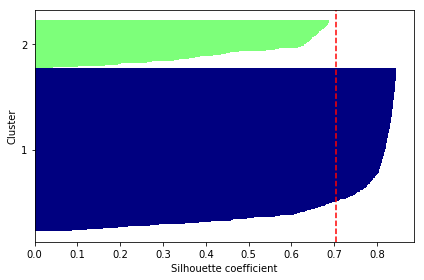

Silhouettes average width :0.7036212409293556


In [48]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
    c_silhouette_vals = silhouette_vals[y_km==c] # extracts records with the current cluster label
    c_silhouette_vals.sort() # sort the silhouette vals for the current class
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()
print("Silhouettes average width :"+str(silhouette_avg))

In [49]:
y_pred=km.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.77      0.75      0.76       236
    Class 1       0.09      0.10      0.10        58

avg / total       0.64      0.63      0.63       294



ROC AUC: 0.43


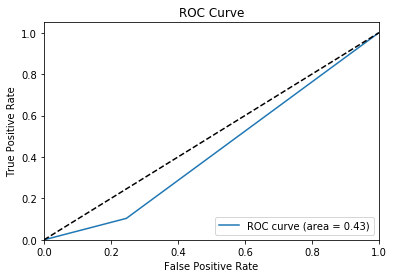

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

| Dataset | Distortion | Silhouettes average width | Precision | Recall | ROC_AUC |
| ------ | ------ | ------ | ------ | ------ | ------ |
| Main Encoded Data | 41357475713.04 | 0.4553015610935002 | 0.70 | 0.52 | 0.52 |
| Backward Elimination SAS | 166199.59 | 0.3504970191284379 | 0.78 | 0.44 | 0.60 |
| CFS on Weka | 6650183194.30 | 0.7036212409293556 | 0.64 | 0.63 | 0.43 |

# Conclusion

As a result we got much greater distortion from before and lower predicting values (lower Precision and lower ROC_AUC). 
We believe that is noteworthy how much higher is the silhouette score, so this third dataset would probably be the first choice for pure clustering purposes, but since we are actually trying to predict a class the best choise still remains the second one, the dataset obtain with a backward elimination future selection.